# Homework 2: Pandas

Today we'll practice data exploration in pandas! Each of these cells should consist of a single line of pandas, answering the question.

First, you'll need to download the dataset "Top American Colleges 2022" from Kaggle.com and get it into this directory. You'll need to make an account first.

Below is a list of useful functions. Part of this homework is practicing reading the documentation, so you'll want to look them up as you go. I'd recommend starting with this: https://pandas.pydata.org/docs/user_guide/10min.html. Once you've read that, in general you can find the API for any of these functions by searching their name plus pandas.

List of helpful functions:

* read_csv
* head
* unique
* groupby
* apply (An important note about this one--pay careful attention to the weird axis argument. When you apply over a series, you often don't need it, but when you apply over a dataframe axis=1 and axis=0 will do very different things.)
* value_counts
* df.columns ('columns' is a dataframe variable that tracks the columns)
* isin
* fillna
* astype
* hist

In [1]:
In [1]: import numpy as np

In [2]: import pandas as pd

## The Basics

First, read the dataframe in. Store it in a variable called "df".

In [2]:
df = pd.read_csv ('top_colleges_2022.csv')


Let's get a feel for our dataframe. Print out a list of columns

In [3]:
dfColumns = df.columns
print(dfColumns)

Index(['description', 'rank', 'organizationName', 'state', 'studentPopulation',
       'campusSetting', 'medianBaseSalary', 'longitude', 'latitude', 'website',
       'phoneNumber', 'city', 'country', 'state.1', 'region', 'yearFounded',
       'stateCode', 'collegeType', 'carnegieClassification',
       'studentFacultyRatio', 'totalStudentPop', 'undergradPop',
       'totalGrantAid', 'percentOfStudentsFinAid', 'percentOfStudentsGrant'],
      dtype='object')


Now print out the first ten elements. There's a single function that does it by default.

In [4]:
result = df.head(10)
print(result)


                                         description  rank  \
0  A leading global research university, MIT attr...     1   
1  Stanford University sits just outside of Palo ...     2   
2  One of the top public universities in the coun...     2   
3  Princeton is a leading private research univer...     4   
4  Located in upper Manhattan, Columbia Universit...     5   
5  The University of California, Los Angeles is t...     6   
6  Located in rural Williamstown, MA, Williams Co...     7   
7  Yale University is the second oldest Ivy Leagu...     8   
8  Duke offers 53 undergraduate majors at its Dur...     9   
9  Founded by Benjamin Franklin, The University o...    10   

                        organizationName state  studentPopulation  \
0  Massachusetts Institute of Technology    MA              12195   
1                    Stanford University    CA              20961   
2     University of California, Berkeley    CA              45878   
3                   Princeton University 

## Exploration

Now let's learn to do some exploration. Try printing out the median "medianBaseSalary"


In [5]:
df['medianBaseSalary'].median()

112800.0

Making it a little more complicated--print out the median "medianBaseSalary" only for urban colleges.

In [6]:


df.loc[df['campusSetting'] == 'Urban', 'medianBaseSalary'].median()

113100.0

Now, still using one statement, let's print out median "medianBaseSalary" for all different possible values of "campusSetting". You'll need a statement we haven't used yet.

In [7]:
df.groupby("campusSetting")[["medianBaseSalary"]].median()

,medianBaseSalary
campusSetting,
Rural,111450.0
Suburban,113500.0
Urban,113100.0


Print out the number of colleges by state. Your results should look something like:

NY    63<br>
CA    55

etc.

In [8]:

df["state"].value_counts()


NY    63
CA    55
PA    33
MA    27
TX    26
IL    16
NJ    16
OH    15
MI    15
FL    14
VA    14
WA    13
MN    12
MD    12
IN    12
NC    11
TN     9
OR     9
GA     9
WI     8
MO     8
CT     8
CO     7
SC     6
AL     5
IA     5
DC     5
RI     5
AZ     4
NH     4
ME     4
VT     4
UT     4
KY     4
LA     4
OK     3
NE     3
NM     3
ID     3
NV     2
ND     2
MS     2
HI     2
MT     2
AR     2
SD     2
KS     2
PR     1
DE     1
WY     1
WV     1
Name: state, dtype: int64

Display just the line for University of Maryland. (There are a couple of ways of doing this.)

In [9]:
df.loc[df['organizationName'] == 'University of Maryland, College Park']

,description,rank,organizationName,state,studentPopulation,campusSetting,medianBaseSalary,longitude,latitude,website,...,yearFounded,stateCode,collegeType,carnegieClassification,studentFacultyRatio,totalStudentPop,undergradPop,totalGrantAid,percentOfStudentsFinAid,percentOfStudentsGrant
39,"The University of Maryland, College Park, is a...",40,"University of Maryland, College Park",MD,44404,Suburban,124500.0,-76.937269,38.980725,http://www.umd.edu,...,1858.0,MD,Public,Doctoral Universities: Very High Research Acti...,17,44404,32954,28679244.0,67.0,53.0


## Modifications

Let's start modifying our dataframe! Remember, dataframe operations return a copy by default, so you'll either need to use the inplace=True, or just assign the dataframe back into itself (as in, df = df.someFunction()).

Start by filling in all blank phone numbers with "no number"



In [10]:


dfPhone = df.phoneNumber

dfPhone.fillna('no number')


0        617-253-1000
1        650-723-2091
2      (510) 642-6000
3        609-258-3000
4        212-854-1754
            ...      
493    (631) 687-5100
494      610-861-1320
495         no number
496         no number
497    (901) 678-2000
Name: phoneNumber, Length: 498, dtype: object

Take the website column and change it so that no string includes "http://" or "www"

In [11]:

dfWeb = df.website
dfweb2 = dfWeb.replace('www','', regex=True)
dfweb2.replace('http://','', regex=True)


0           web.mit.edu
1         .stanford.edu
2         .berkeley.edu
3        .princeton.edu
4         .columbia.edu
             ...       
493          .sjcny.edu
494       .moravian.edu
495    https://.ltu.edu
496                 NaN
497         .mephis.edu
Name: website, Length: 498, dtype: object

Create a new column called "faculty" that computes the number of faculty at each university

In [12]:

df["faculty"] = df["studentPopulation"] / df["studentFacultyRatio"]
df["faculty"] = df["faculty"].astype(int)
print(df.faculty)


0      4065
1      5240
2      2414
3      2133
4      5647
       ... 
493     491
494     269
495     287
496     165
497    1570
Name: faculty, Length: 498, dtype: int64


## Graphs

Let's do some very basic graphing here! Create a histogram for the student population.

<AxesSubplot: >

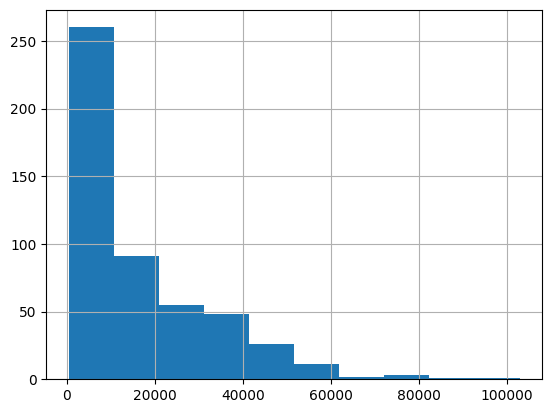

In [13]:
df["totalStudentPop"].hist()



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=67b21374-b16f-4735-8d74-a73c85440579' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>